/home/gururaj/Work/python/github/covid_India/impfuncs.py:94: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_cases=df2_cases[df["Date"]>=start_date]
/home/gururaj/Work/python/github/covid_India/impfuncs.py:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_recovered=df2_recovered[df["Date"]>=start_date]
/home/gururaj/Work/python/github/covid_India/impfuncs.py:96: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_dead=df2_dead[df["Date"]>=start_date]


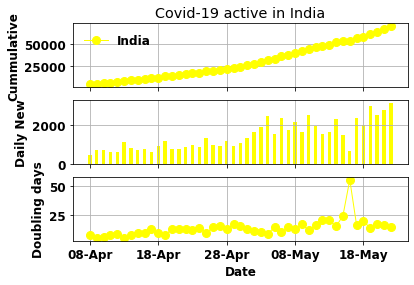

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun May 10 07:55:21 2020

@author: gururaj
"""

from impfuncs import *

start_day=25
end_day=70
dfs=populate_dfs()    
#states=["Kerala","Maharastra"]
states=["Maharastra","Tamilnadu"]
#states=["West Bengal"]
states=["India"]
next(colorcycler)
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,sharex=True)
type="active"
for state in states:
    arr=load_Data(dfs,state=state,day_max=end_day)
    cases=column(arr,2)
    recovery=column(arr,3)
    dead=column(arr,4)
    active=column(arr,5)
    cases_diff=np.diff(cases)
    recovery_diff=np.diff(recovery)
    dead_diff=np.diff(dead)
    active_diff=np.diff(active)
    
    cases_ddays=[get_doubling_s(cases_diff[i-1]/cases[i-1]) for i in range(start_day,end_day)]
    recovery_ddays=[get_doubling_s(recovery_diff[i-1]/recovery[i-1]) for i in range(start_day,end_day)]
    dead_ddays=[get_doubling_s(dead_diff[i-1]/dead[i-1]) for i in range(start_day,end_day)]
    active_ddays=[get_doubling_s(active_diff[i-1]/active[i-1]) for i in range(start_day,end_day)]
    color=next(colorcycler)
    if type=="dead":    
        if len(states)==1:
            color="red"
        ax1.plot(column(arr,1)[range(start_day,end_day)],dead[range(start_day,end_day)],markersize=8,marker="o",linewidth=1,color=color,label=state)
        ax2.bar(column(arr,1)[range(start_day,end_day)],dead_diff[range(start_day-1,end_day-1)],color=color,label=state,width=0.5)
        ax3.plot(column(arr,1)[range(start_day,end_day)],dead_ddays,markersize=8,marker="o",linewidth=1,color=color,label=state)
    if type=="active":    
        if len(states)==1:
            color="yellow"
        
        ax1.plot(column(arr,1)[range(start_day,end_day)],active[range(start_day,end_day)],markersize=8,marker="o",linewidth=1,color=color,label=state)
        ax2.bar(column(arr,1)[range(start_day,end_day)],active_diff[range(start_day-1,end_day-1)],color=color,label=state,width=0.5)
        ax3.plot(column(arr,1)[range(start_day,end_day)],active_ddays,markersize=8,marker="o",linewidth=1,color=color,label=state)
    if type=="cases":    
        if len(states)==1:
            color="blue"
        ax1.plot(column(arr,1)[range(start_day,end_day)],cases[range(start_day,end_day)],markersize=8,marker="o",linewidth=1,color=color,label=state)
        ax2.bar(column(arr,1)[range(start_day,end_day)],cases_diff[range(start_day-1,end_day-1)],color=color,label=state,width=0.5)
        ax3.plot(column(arr,1)[range(start_day,end_day)],cases_ddays,markersize=8,marker="o",linewidth=1,color=color,label=state)
    
    if type=="recovery":    
        if len(states)==1:
            color="green"
        ax1.plot(column(arr,1)[range(start_day,end_day)],recovery[range(start_day,end_day)],markersize=8,marker="o",linewidth=1,color=color,label=state)
        ax2.bar(column(arr,1)[range(start_day,end_day)],recovery_diff[range(start_day-1,end_day-1)],color=color,label=state,width=0.5)
        ax3.plot(column(arr,1)[range(start_day,end_day)],recovery_ddays,markersize=8,marker="o",linewidth=1,color=color,label=state)
    
    

ax3.set_xticks(range(0,end_day-start_day,10))
ax3.set_xlabel("Date",weight='bold')
ax1.set_ylabel("Cummulative",weight='bold')
ax2.set_ylabel("Daily New",weight='bold')
ax3.set_ylabel("Doubling days",weight='bold')
#ax1.set_xticks(fontsize=10)
ax1.grid()
ax2.grid()
ax3.grid()
ax1.legend(frameon=False,loc=0)
ax1.set_title("Covid-19 "+ type+" in "+ " , ".join(states))
from matplotlib import rc
rc('font', weight='bold',size=12)
plt.show()
